In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

%matplotlib inline


In [5]:
data = pd.read_csv('eurusd.csv' , parse_dates = ['Date'] , index_col = "Date")

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


# Strategy Overview

In [7]:
sma_s = 50
sma_l = 200

In [9]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [12]:
data['SMA_S'] = data.price.rolling(sma_s).mean()
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


In [13]:
data['SMA_L'] = data.price.rolling(sma_l).mean()

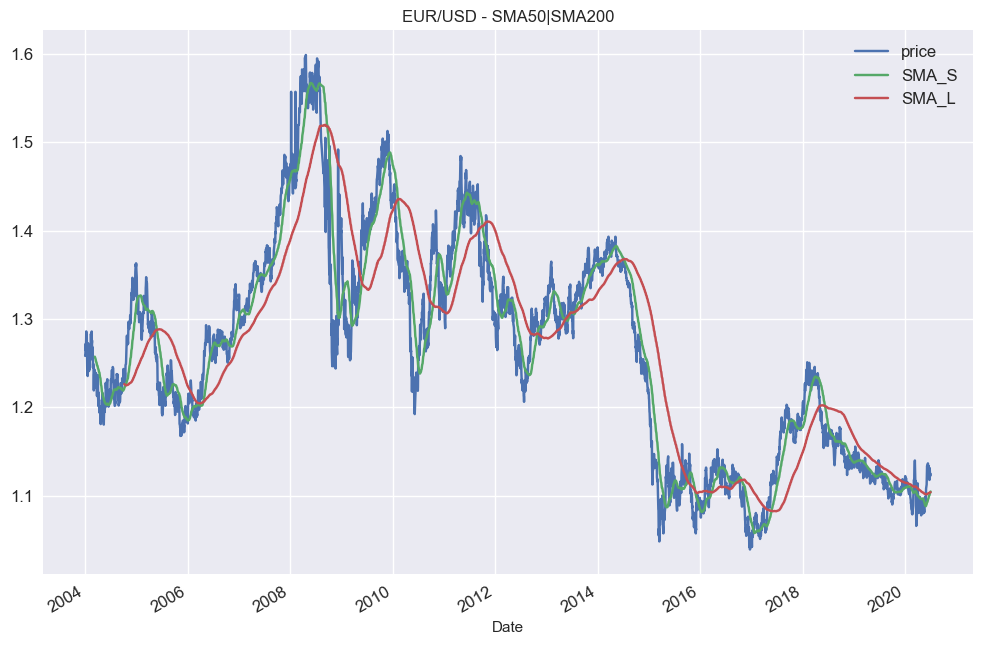

In [14]:
data.plot(figsize = (12,8) , title = "EUR/USD - SMA{}|SMA{}".format(sma_s,sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show() #smoothing of these price trends with their moving averages

In [15]:
data.dropna(inplace = True)

In [16]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


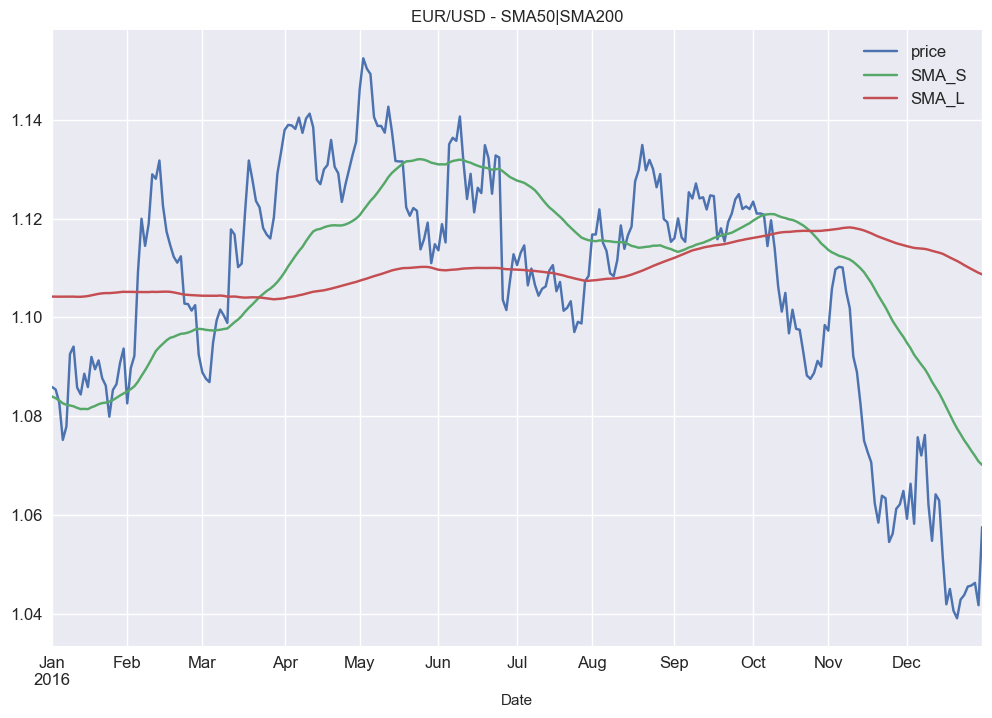

In [17]:
data['2016'].plot(figsize = (12,8) , title = "EUR/USD - SMA{}|SMA{}".format(sma_s,sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show() #here crossover happens around March and at November

In [23]:
# HERE OUR STRATEGY LIES ON THESE COMPARABLE MOVING AVERAGE 
#OF RECENT 50 AND 200 DAYS.SO WE TRY TO SELL OR BE AT SHORT
#POSITION FOR THIS INSTRUMENTAND THEN FROM MARCH TO NOV BE 
#ALONG LONG TERM WITH IT AND THEN SELL OR BE AT SHORT
#POSITION AFTER THE FINAL CROSSOVER.

#IDENTIFYING THESE LONG AND SHORT POSITION SCHEME:

data['position'] = np.where(data['SMA_S'] > data['SMA_L'] , 1, -1)

In [24]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


<Axes: title={'center': 'EUR/USD -SMA50|SMA200'}, xlabel='Date'>

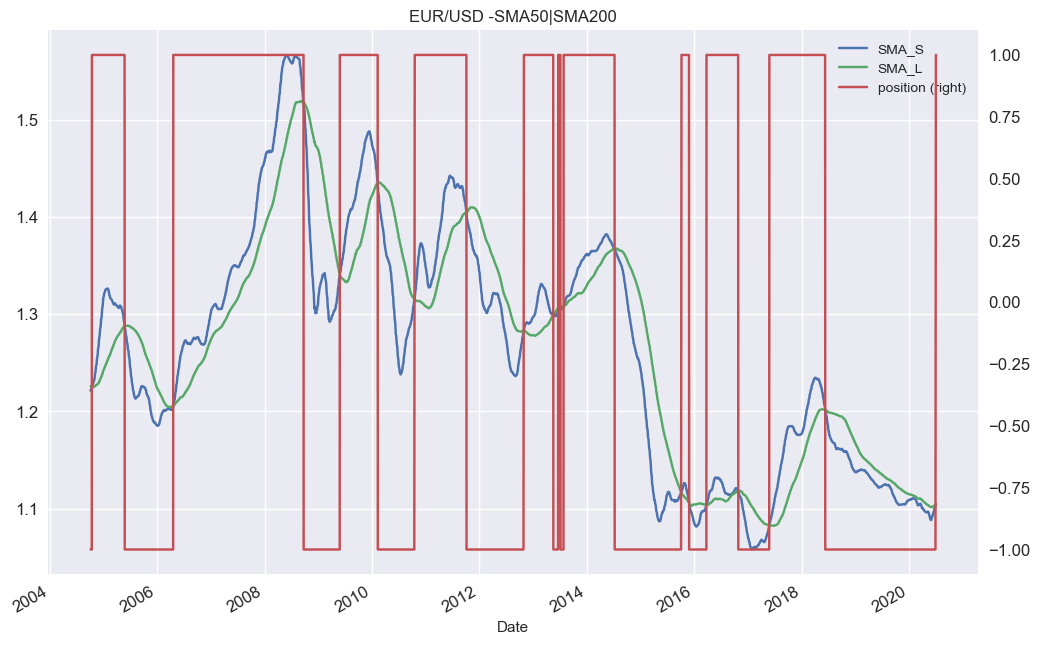

In [25]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize =(12,8), fontsize =12, secondary_y = "position",
                                                title = "EUR/USD -SMA{}|SMA{}".format(sma_s,sma_l))

<Axes: title={'center': 'EUR/USD -SMA50|SMA200'}, xlabel='Date'>

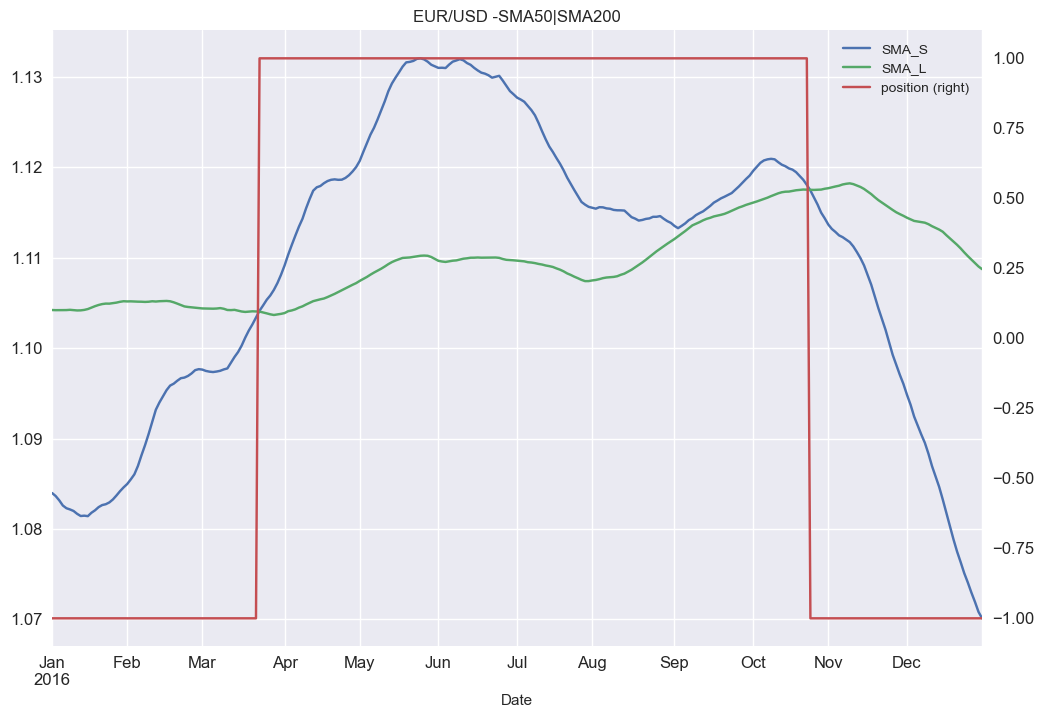

In [27]:
data.loc['2016', ["SMA_S", "SMA_L", "position"]].plot(figsize =(12,8), fontsize =12, secondary_y = "position",
                                                title = "EUR/USD -SMA{}|SMA{}".format(sma_s,sma_l))

# Vectorized Strategy Backtesting

In [30]:
data['returns'] = np.log(data.price.div(data.price.shift(1)))

In [31]:
data

,price,SMA_S,SMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562


In [35]:
data['strategy'] = data.position.shift(1)*data['returns']

In [36]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [37]:
data.dropna(inplace = True)

In [39]:
#absolute performance
data[['returns' , 'strategy']].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [41]:
#absolute performance or final returns on investment
#with market randomisation OR with SMA Strategy

data[['returns' , 'strategy']].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [42]:
#strategy is effective than buy or hold position
# annualized mean return

data[['returns' , 'strategy']].mean()*252

returns    -0.005438
strategy    0.015435
dtype: float64

In [44]:
# annualised risk
data[['returns' , 'strategy']].std()*np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [45]:
# cumulative returns with strategy or simple buy and hold returns

data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
data['creturns'] = data['returns'].cumsum().apply(np.exp)

In [46]:
data

,price,SMA_S,SMA_L,position,returns,strategy,cstrategy,creturns
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,0.998526,1.001476
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,0.989598,1.010511
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,0.991673,1.008396
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,0.996746,1.003265
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,0.994486,1.005545
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,1.271272,0.921130
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,1.278218,0.916125
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,1.281497,0.913781


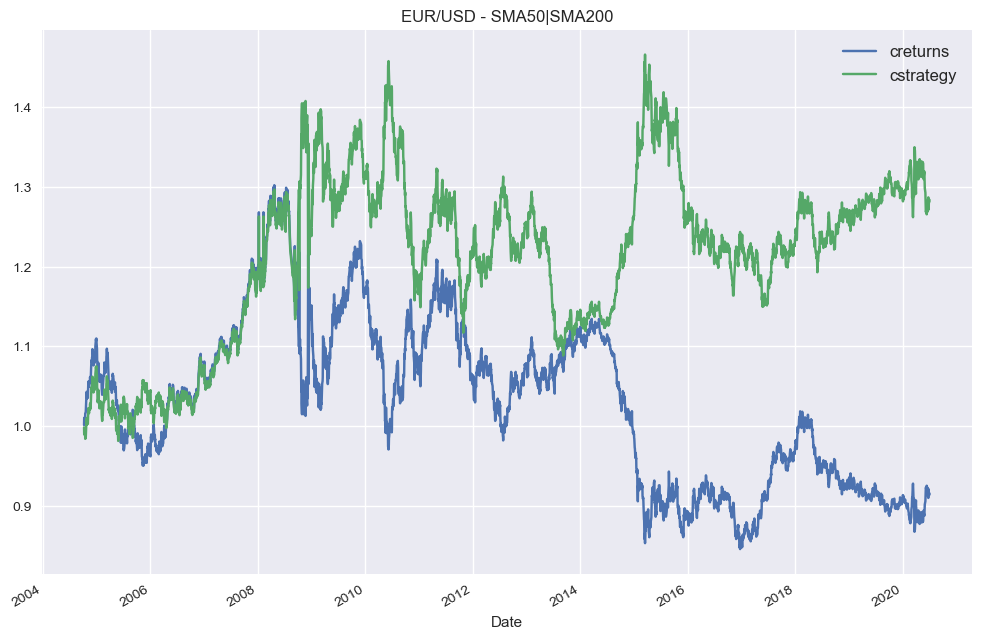

In [47]:
data[['creturns' , 'cstrategy']].plot(figsize = (12,8) , title = 'EUR/USD - SMA{}|SMA{}'.format(sma_s,sma_l))
plt.legend(fontsize = 12)
plt.show()

In [50]:
#clearly strategy has otperform specially after 2016 year but trading
#cost are another factor which can eat up this performance

outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3676743925451291

In [51]:
# here it has outperformed benchmark with 36.76% 
#but we can judge this before incorporating trading costs
# plus this strategy is not stable from plot since it can be expected
#to  dip or rise at any time so not optimal or best strategy

# Finding optimal Strategy

In [52]:
df = pd.read_csv("eurusd.csv" , parse_dates = ['Date'] , index_col = 'Date')

In [53]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [55]:
def test_strategy(SMA) :
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1)))
    data['SMA_S'] = data.price.rolling(int(SMA[0])).mean()
    data['SMA_L'] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data['position'] = np.where(data['SMA_S'] > data['SMA_L'] , 1,-1)
    data['strategy'] = data.position.shift(1)*data['returns']
    data.dropna(inplace = True)
    
    return np.exp(data['strategy'].sum())

In [56]:
test_strategy((50,200))

1.2835003323288487

In [57]:
test_strategy((75,150))

1.58974017632631

In [58]:
test_strategy((25,252))

1.1755957408242586

In [59]:
SMA_S_range = range(10,50,1)
SMA_L_range = range(100,252,1)

In [60]:
SMA_S_range

range(10, 50)

In [63]:
from itertools import product
list(product(SMA_S_range, SMA_L_range))
combinations = list(product(SMA_S_range,SMA_L_range))
len(combinations)

6080

In [64]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))
results

[0.919639848594834,
 0.9017909001165384,
 0.9088514707606253,
 0.9172039081156574,
 0.9902316124249487,
 0.9839526868794093,
 1.0304555530676556,
 1.0580627844394732,
 1.0209474697557395,
 1.1225414594776157,
 1.1439396770251975,
 1.0928826062479924,
 1.158686928858328,
 1.1472509415077026,
 1.0535678507360313,
 1.0834788006764182,
 1.151663935854727,
 1.1505573494996577,
 1.1653183679562213,
 1.2167014670211942,
 1.2416587315963903,
 1.1667630873747963,
 1.2185865782849303,
 1.1718965787619908,
 1.1816366630339725,
 1.13721357858156,
 1.1858141820530623,
 1.266796025009642,
 1.2954797436418617,
 1.2487089215312812,
 1.2774725832850917,
 1.2815688488537094,
 1.315601386000957,
 1.3268193066021445,
 1.3746941118458667,
 1.3435175722121493,
 1.383038780593678,
 1.3973468547986456,
 1.3933923926338347,
 1.3202781031636979,
 1.3108447683042326,
 1.3519662172615805,
 1.2755744454123736,
 1.2512368246963705,
 1.1986108264031603,
 1.1860503041698052,
 1.2053044885749076,
 1.2413672239985285,


In [65]:
np.max(results)

2.5266939897810787

In [66]:
np.argmax(results)

5509

In [67]:
combinations[np.argmax(results)]

(46, 137)

In [69]:
many_results = pd.DataFrame(data = combinations , columns =['SMA_S','SMA_L'])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [71]:
many_results['performance'] = results
many_results

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232
...,...,...,...
6075,49,247,1.282403
6076,49,248,1.303129
6077,49,249,1.267525
6078,49,250,1.275176


In [72]:
many_results.nlargest(10,'performance')

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [73]:
many_results.nsmallest(10,'performance')

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784


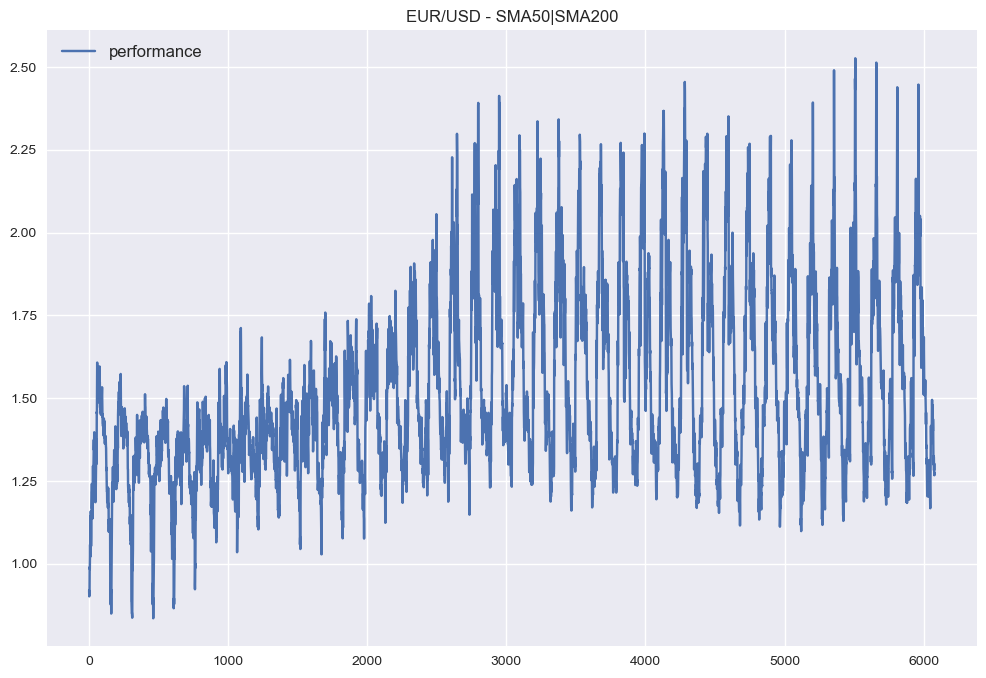

In [74]:
many_results['performance'].plot(figsize = (12,8) , title = 'EUR/USD - SMA{}|SMA{}'.format(sma_s,sma_l))
plt.legend(fontsize = 12)
plt.show()